# **Importing Libraries**

In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

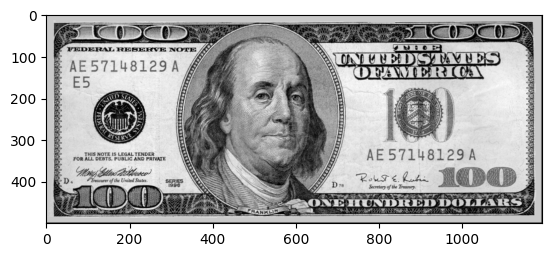

In [73]:

img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0314(a)(100-dollars).tif",0)

plt.imshow(img,cmap="gray")

plt.show()


# Grey level Slicing

In [74]:
def grey_level_slicing(img,h,l,b=False):
  img_copy = np.copy(img)
  w, h= img.shape
  for i in range(w):
    for j in range(h):
        if l<=img[i][j]<=h:
            img_copy[i][ j] = 255
        else:
          if b:
            pass
            img_copy[i][ j] = 0
  return img_copy

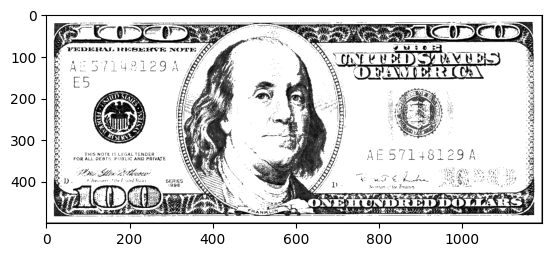

In [75]:

img_copy=grey_level_slicing(img,180,100)

plt.imshow(img_copy, cmap='gray')

plt.show()

In [76]:
def bit_plane_slicing(img, bit):
    img_copy = np.zeros_like(img, dtype=np.uint8)
    w, h = img.shape
    for i in range(w):
        for j in range(h):
            b = (img[i][j] >> bit) & 1
            img_copy[i][j] = 255 * b
    return img_copy

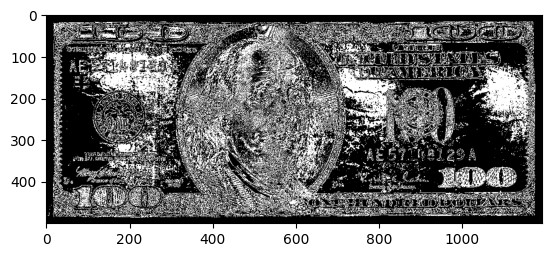

In [77]:
plt.imshow(bit_plane_slicing(img,5),cmap='gray')

In [78]:
def bit_plane_slicing(img, bit):
    img_copy = np.zeros_like(img, dtype=np.uint8)
    w, h = img.shape
    for i in range(w):
        for j in range(h):
            b = (img[i][j] >> bit) & 1
            img_copy[i][j] = 255 * b
    return img_copy

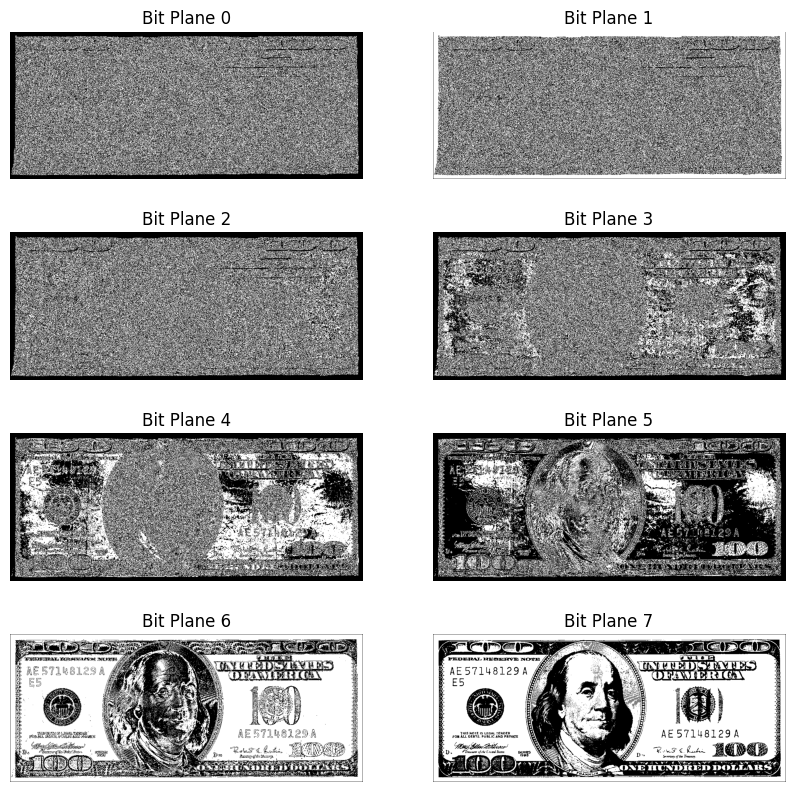

In [79]:
def plot_bit_planes(img):
    plt.figure(figsize=(10, 10))

    for i in range(8):
        bit_plane = bit_plane_slicing(img, i)
        plt.subplot(4, 2, i + 1)
        plt.imshow(bit_plane, cmap='gray')
        plt.title(f'Bit Plane {i}')
        plt.axis('off')

    plt.show()


plot_bit_planes(img)

In [80]:
def contrast_stretching(img, alpha=0.5, beta=0.5):
    contrast_stretched_image = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            contrast_stretched_image[i, j] = np.clip(alpha * img[i, j] + beta, 0, 255).astype(np.uint8)

    return contrast_stretched_image

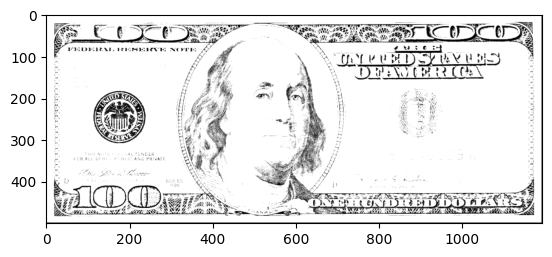

In [81]:
img_copy=contrast_stretching(img,3,0.4)
plt.imshow(img_copy, cmap='gray')

plt.show()

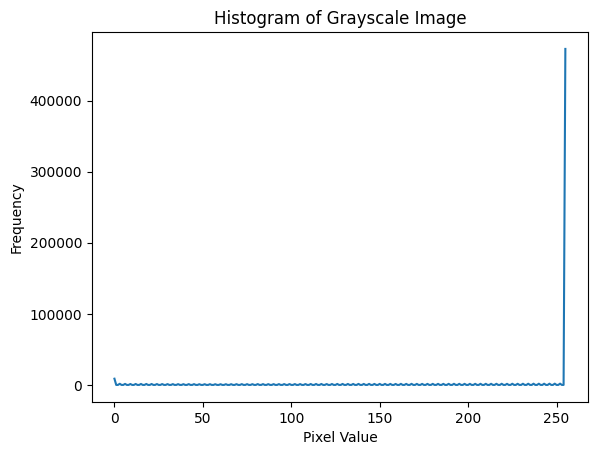

In [82]:
plot_histogram(img_copy)
plt.show()

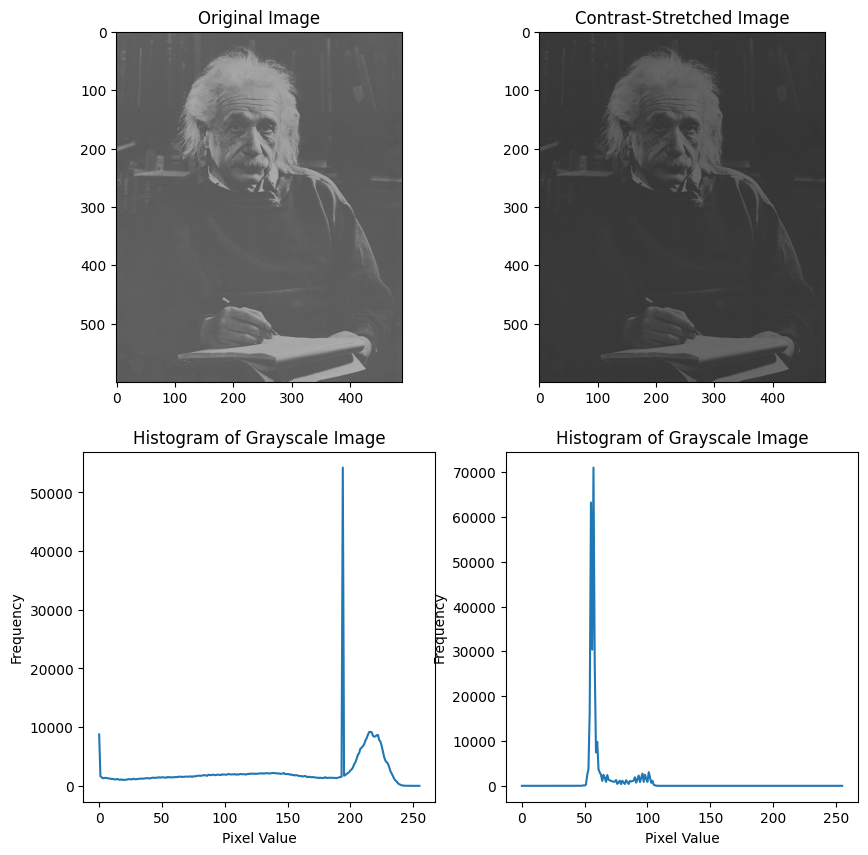

In [83]:
original_image = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0354(a)(einstein_orig).tif")

alpha_value = .6
beta_value = .8
contrast_stretched_image = contrast_stretching(original_image, alpha=alpha_value, beta=beta_value)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(contrast_stretched_image, )
plt.title("Contrast-Stretched Image")

plt.subplot(2, 2, 3)
plot_histogram(img)
plt.subplot(2, 2, 4)
plot_histogram(contrast_stretched_image)
plt.show()

In [84]:
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0354(a)(einstein_orig).tif")


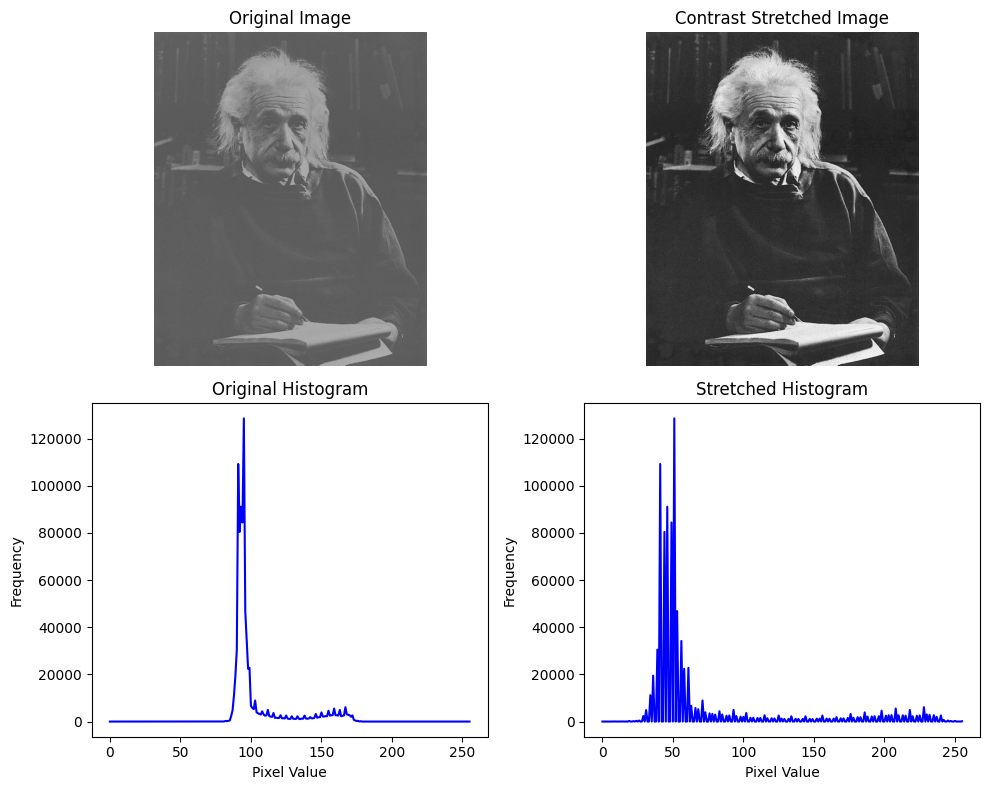

In [85]:
min_val = np.min(img)
max_val = np.max(img)
stretched_img = np.uint8(255 * ((img - min_val) / (max_val - min_val)))
hist_original, _ = np.histogram(img.flatten(), 256, [0, 256])
hist_stretched, _ = np.histogram(stretched_img.flatten(), 256, [0, 256])
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.plot(hist_original, color='b')
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
plt.plot(hist_stretched, color='b')
plt.title('Stretched Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
